<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 머신러닝 모델링을 할 때 자주 사용되는 전처리 방법을 리뷰합니다.
- 익숙하지 않은 방법은 반복 실습을 통해 익숙해져야 합니다.
- 다룰 내용
    - 라이브러리 불러오기
    - 데이터 불러오기
    - 불필요한 변수 제거
    - NaN 조치
    - 가변수화
    - 데이터 분리
    - 정규화

# 1.라이브러리, 데이터 불러오기

- 우선 사용할 라이브러와 분석 대상 데이터를 불러옵니다.

## 1.1. 라이브러리 불러오기

- 사용할 라이브러리를 불러옵니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. 데이터 읽어오기

- 분석 대상 데이터를 읽어옵니다.

In [2]:
# 데이터 읽어오기
path = "https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv"
titanic = pd.read_csv(path)

In [3]:
# 상위 데이터 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 이후에 필요할 수 있으니 데이터프레임을 복사해 둡니다.

In [4]:
# 데이터프레임 복사
titanic_bk = titanic.copy()

# 2.불필요한 변수 제거

- Cabin은 77.1%가 NaN이기에 채울 방법이 마땅치 않으니 제거합니다.
- PassengerId, Name, Ticket은 Unique 한 값이므로 제거합니다.
- axis=0는 행, axis=1은 열을 의미함을 기억하세요.

In [7]:
# 여러 열 동시 제거
drop_col = ['Cabin', 'PassengerId', 'Name', 'Ticket']
titanic.drop(drop_col, axis=1, inplace=True)

In [8]:
# 확인
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 3.NaN 조치

- NaN 값이 포함되어 있으면 정확한 분석와 예측을 할 수 없으니 이에 대한 처리가 필요합니다.

## 3.1. NaN 확인

- NaN 값이 있는지 우선 확인합니다.

In [9]:
# 변수들의 NaN 포함 상태 화인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
titanic.isna().sum()/len(titanic) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

## 3.2. NaN 삭제

- NaN 값이 포함된 행이나 열이 중요하지 않다면 해당 행이나 열을 제거합니다.
- NaN 값이 너무 많이 포함된 경우, 적절히 채울 수 없다면 해당 행과 열을 제거합니다.

### 3.2.1. 행 제거

- NaN 값이 포함된 행이 그리 많지 않다면 해당 행을 제거합니다.
- 모든 행을 제거하거나 일부 행을 제거할 수 있습니다.

**1) 모든 행 제거**

In [11]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# NaN이 포함된 모든 행(axis=0) 제거
titanic2.dropna(axis=0, inplace=True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# 데이터 크기 확인
titanic2.shape

(712, 8)

**2) 일부 행 제거**

In [14]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
# Age 변수에 NaN이 포함된 행 제거
titanic2.dropna(subset=['Age'], axis=0, inplace=True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### 3.2.2. 변수 제거

- NaN 값이 포함된 변수가 그리 중요하지 않거나, NaN 값이 너무 많다면 해당 변수를 제거합니다.

In [16]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
# NaN 열이 포함된 모든 변수(axis=1) 제거
titanic2.dropna(axis=1, inplace=True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## 3.3. NaN 채우기

- NaN 값이 포함된 행이나 열을 제거할 수 없다면 특정 값으로 채웁니다.

### 3.3.1. 앞/뒤 값으로 채우기

- 시계열 데이터인 경우 많이 사용하는 방법입니다.
- method='ffill': 바로 앞의 값으로 채우기
- method='bfill': 바로 뒤의 값으로 채우기

In [19]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [20]:
# NaN 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [22]:
# 연습을 위해 복사
air2 = air.copy()

# Ozone 변수 NaN 값을 바로 앞의 값으로 채우기
air2['Ozone'].fillna(method='ffill', inplace=True)

# Solar.R 변수 NaN 값을 바로 뒤의 값으로 채우기
air2['Solar.R'].fillna('bfill', inplace=True)

# 확인
air2.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 3.3.2. 선형 보간법으로 채우기

- interpolate 메소드에 method='linear' 옵션을 지정해 선형 보간법으로 채웁니다.

In [23]:
# 연습을 위해 복사
air2 = air.copy()

# 선형 보간법으로 채우리
air2.interpolate(method='linear', inplace=True)

# 확인
air2.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 3.3.3. 특정 값으로 채우기

- 임의의 값을 지정해 NaN 값을 채웁니다.
- 평균값이나 최빈값으로 채우는 경우가 많습니다.

In [24]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**1) 평균값으로 채우기**

In [26]:
# Age 평균 구하기
mean_age = titanic2['Age'].mean()

# NaN을 평균값으로 채우기
titanic2['Age'].fillna(mean_age, inplace=True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

**2) 최빈값으로 채우기**

In [27]:
# Embarked 변수 값 확인
titanic2['Embarked'].value_counts(dropna=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# NaN 값을 가장 빈도가 높은 값으로 채우기
titanic2['Embarked'].fillna('S', inplace=True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 4.가변수화

- 범주형 값을 갖는 변수에 대한 One-Hot Encoding을 진행합니다.

In [29]:
# 연습을 위해 복사
titanic3 = titanic2.copy()

# 데이터 확인
titanic3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- 다중공선성 문제를 없애기 위해 drop_first=True 옵션을 지정합니다.

In [31]:
# 가변수 대상 변수 식별
cols = ['Pclass', 'Sex', 'Embarked']

# 가변수화
titanic3 = pd.get_dummies(titanic3, columns=cols, drop_first=True)

# 확인
titanic3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


# 5.데이터 분리

- 머신러닝 모델링을 위해서는 x, y 로 데이터를 분리해야 합니다.
- 독립변수와 종속변수를 나누는 과정입니다.

In [32]:
# 데이터 확인
titanic3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


- 예측해야 할 값, 즉 Target을 명확히 구분합니다.
- 원본 데이터에서 Target 값을 제외한 것이 x이며, Target 값을 갖는 것이 y입니다.

In [33]:
# Target 지정
target = 'Survived'

# x, y 분리
x = titanic3.drop(columns=target, axis=1)
y = titanic3[target]

# 확인
print(x.shape)
print(y.shape)

(891, 9)
(891,)


- 분리한 결과를 확인합니다.

In [34]:
# x 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [35]:
# y 확인
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# 6.정규화

- 모든 변수가 동일한 범위의 값을 갖도록 일괄 처리하는 것을 정규화라고 합니다.
- 거리를 사용해 예측하는 알고리즘의 경우 정규화 과정을 필히 수행해햐 합니다.
- 정규화 이전의 값은 서로 다른 범위의 값을 가집니다.

In [36]:
# 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


- 시각화하면 그 차이를 명확히 알 수 있습니다.

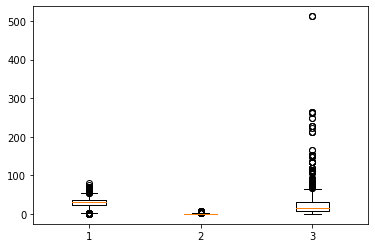

In [37]:
# Boxplot으로 확인
plt.boxplot([x['Age'], x['SibSp'], x['Fare']])
plt.show()

- 정규화를 진행합니다.
- 참고) sklearn 라이브러리에서 정규화 모듈을 제공합니다.

$$\large x_{new}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [38]:
# 정규화 (모두 0~1 사이 값으로 변경)
x = (x - x.min()) / (x.max() - x.min())

- 결과를 확인합니다.

In [39]:
# 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0,0.0,1.0


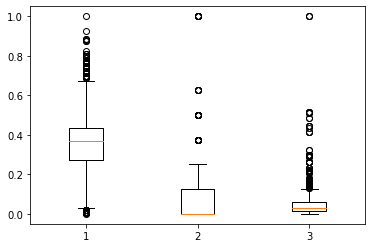

In [40]:
# Boxplot으로 확인
plt.boxplot([x['Age'], x['SibSp'], x['Fare']])
plt.show()

# 7. 참고 : 토이 데이터셋

In [47]:
# 모듈 불러오기
from sklearn.datasets import load_iris

# 데이터 가져오기
iris = load_iris()

# 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [51]:
# 변수이름 확인
print(iris.feature_names)

# 데이터 확인 (x 값)
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [50]:
# Target 이름
print(iris.target_names)

# 데이터 확인(y 값)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
# 데이터 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========